In [7]:
import numpy as np
import matplotlib.pyplot as plt
import astropy
from astropy.constants import c as clight
from astropy.constants import e as e_elec
from astropy.constants import h as hplanck
from astropy.cosmology import WMAP9 as cosmo

$$\tau_{\rm eff, LL} (r,\nu) = \int_0^r \kappa_{\rm LL} (r',\nu) d r'$$

In [5]:
e_elec

<<class 'astropy.constants.codata2018.EMCODATA2018'> name='Electron charge' value=1.602176634e-19 uncertainty=0.0 unit='C' reference='CODATA 2018'>

In [19]:
def drdz(z):
    return clight/cosmo.H(z)/(1+z)

def drdz_matter_dom(z):
    return clight/cosmo.H0/cosmo.Om0**0.5*(1+z)**(-2.5)

In [39]:
#(hplanck*clight/astropy.units.quantity.Quantity(1,"eV")).to("AA")
eV2lambdaAA=lambda eV:12398.42/eV
lambdaAA2eV=lambda AA:12398.42/AA

In [53]:
def sigma_HI_nu(nu):
    nuHI=13.6
    sigma_HI=6.30e-18*(1.34*(nu/nuHI)**-2.99-0.34*(nu/nuHI)**-3.99) #cm**2
    sigma_HI[nu<nuHI]=0
    return sigma_HI

Text(0, 0.5, 'cm^2')

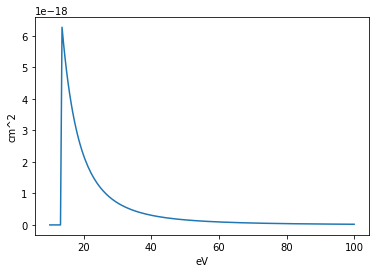

In [56]:
test_eV_array=np.linspace(10.,100,200)
test_AA_array=eV2lambdaAA(test_eV_array)
plt.plot(test_eV_array,sigma_HI_nu(test_eV_array))
plt.xlabel("eV")
plt.ylabel("cm^2")

$$ d \tau = n \sigma dr $$

In [31]:
eV2lambdaAA(13.6)

911.6485294117647

In [ ]:
dlambda/lambda=v/c

In [41]:
clight

<<class 'astropy.constants.codata2018.CODATA2018'> name='Speed of light in vacuum' value=299792458.0 uncertainty=0.0 unit='m / s' reference='CODATA 2018'>

In [50]:
def calc_tau(nHI,dr_pMpc,eVarray):
    dr=dr_pMpc*3.08e24 #cm
    return nHI*dr*sigma_HI_nu(eVarray) #

In [76]:
def tau_profile(vspec_out,nHI,dr_pMpc):
    lambdaAA_out=eV2lambdaAA(13.6)*(1-vspec_out/2.9979246e5)
    eV_out=lambdaAA2eV(lambdaAA_out)
    return calc_tau(nHI,dr_pMpc,eV_out)

In [77]:
def tau_per_denpixel(vspec_out,pos_pMpc,nHI,vlos,dr_pMpc,Hz):
    vel_space_pos=pos_pMpc*Hz-vlos
    v_relative=vspec_out-vel_space_pos
    lambdaAA_out=eV2lambdaAA(13.6)*(1-v_relative/2.9979246e5)
    eV_out=lambdaAA2eV(lambdaAA_out)
    return calc_tau(nHI,dr_pMpc,eV_out)

In [100]:
dr_pMpc=0.01
Ncell=500
print(dr_pMpc*Ncell)
dr_pMpc_array=np.ones(Ncell)*dr_pMpc
pos_arr_pMpc=np.cumsum(dr_pMpc_array)
nHI_arr=np.ones(Ncell)*1e-8
vlos_arr=np.zeros(Ncell)

5.0


In [101]:
def integ_tau(vspec_out,pos_arr_pMpc,nHI,vlos,dr_pMpc,Hz):
    tau_matrix=np.array([tau_per_denpixel(vspec_out,pos_arr_pMpc[i],\
                       nHI[i],vlos[i],dr_pMpc[i],Hz) for i in range(len(pos_arr_pMpc))])
    return np.sum(tau_matrix,axis=0)

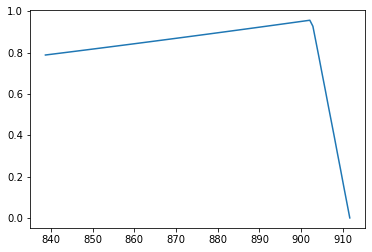

In [102]:
plt.plot(AAout,integ_tau(vout,pos_arr_pMpc,nHI_arr,vlos_arr,dr_pMpc_array,600))


Text(0, 0.5, 'transmitted flux')

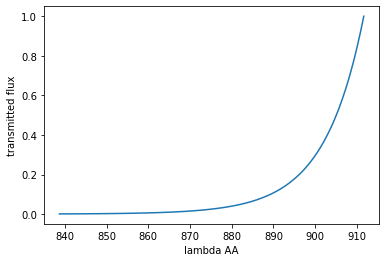

In [91]:
plt.plot(AAout,np.exp(-integ_tau(vout,pos_arr_pMpc,nHI_arr,vlos_arr,dr_pMpc_array,600)))
plt.xlabel("lambda AA")
plt.ylabel("transmitted flux")

In [78]:
vout=np.linspace(0,24000,100)
AAout=eV2lambdaAA(13.6)*(1-vout/2.9979246e5)

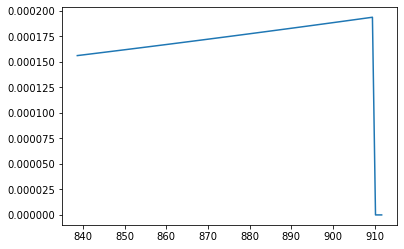

In [79]:
plt.plot(AAout,tau_per_denpixel(vout,1,1e-8,0,0.001,600))

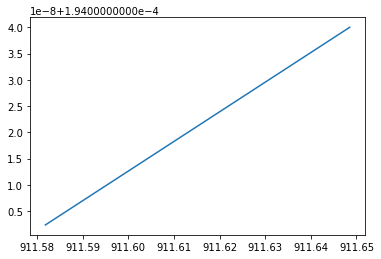

In [70]:

plt.plot(AAout,tau_profile(vout,1e-8,0.001))

In [ ]:
def absorpspec_per_denpixel(vspec_out,pos_pMpc,nHI,vlos,T,dR,Hz):
    lambdaAA=
    lambdaAA2eV

In [ ]:
def integ_tau(nHI_array,dr_pMpc_array, pos_pMpc_array, eVout, Hz, vlos_array=0):
    uj=Hz*pos_pMpc_array+vlos_array

In [ ]:
def tau_ion_per_denpixel(vspec_out,pos_pMpc,nHI,vlos,T,dR,Hz,z):
    dR=dR_pMpc*3.08e24

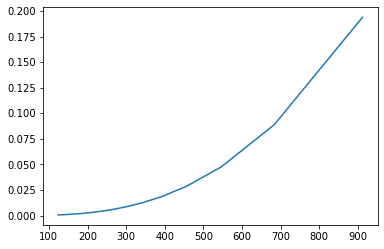

In [38]:
plt.plot(test_AA_array,calc_tau(1e-4,1e-4,test_eV_array))
# plt.loglog()

In [21]:
vout=np.linspace(0,20000,100)

In [20]:
(912-840)/912*clight.to("km/s")

<Quantity 23667.82563158 km / s>

In [71]:
clight.to("km/s")

<Quantity 299792.458 km / s>